<a href="https://colab.research.google.com/github/ybii22/Machine-Learning/blob/main/Week%206/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Baca file Excel langsung
file = "/content/clusteringweek06.csv"
df = pd.read_csv (file)

# Lihat 5 baris pertama
print(df.head())

    x1        x2        x3        x4        x5        x6        x7        x8  \
0  1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945 -0.150063   
1  1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835 -0.222475   
2  1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714 -0.242234   
3  1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501 -0.194347   
4  1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884 -0.265423   

         x9       x10  ...       x13       x14       x15       x16       x17  \
0 -0.171128  0.124676  ... -0.156436  0.082245  0.135752 -0.024017 -0.108351   
1 -0.207693  0.170883  ... -0.254341  0.022786  0.163320  0.012022 -0.090974   
2 -0.219153  0.232538  ... -0.237384  0.050791  0.207338  0.083536 -0.050691   
3 -0.098181  0.270375  ... -0.317084 -0.011567  0.100413 -0.050224 -0.136009   
4 -0.172700  0.266434  ... -0.298524  0.037439  0.219153  0.062837 -0.048885   

        x18       x19       x20       

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Ambil hanya kolom numerik
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# Clustering
kmeans_labels = KMeans(n_clusters=2, random_state=42).fit_predict(X_scaled)
agglo_labels = AgglomerativeClustering(n_clusters=2).fit_predict(X_scaled)

# Gabungkan hasil ke DataFrame
df['KMeans_Cluster'] = kmeans_labels
df['Agglo_Cluster'] = agglo_labels

# Tampilkan hasil cluster saja
df[['KMeans_Cluster', 'Agglo_Cluster']].head()

,KMeans_Cluster,Agglo_Cluster
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


=== KMEANS RESULTS ===
   Clusters        Inertia  Silhouette Score  Calinski-Harabasz  \
0         2  101566.370722          0.335177        3507.651478   
1         3   91202.976851          0.337314        2361.454885   
2         4   79560.738039          0.347646        2155.178925   
3         5   69174.293540          0.363672        2128.716642   
4         6   64836.515379          0.343482        1912.848778   
5         7   56835.686119          0.267896        1986.826688   
6         8   54782.293649          0.242439        1805.067833   
7         9   50773.921361          0.231548        1774.797858   
8        10   48221.877585          0.236287        1703.117473   

   Davies-Bouldin  Dunn-Index  
0        1.285364    0.015554  
1        1.236326    0.018140  
2        1.536293    0.015927  
3        1.307858    0.017465  
4        1.460474    0.017871  
5        1.471155    0.021846  
6        1.418774    0.024520  
7        1.508268    0.025040  
8        1.468398 

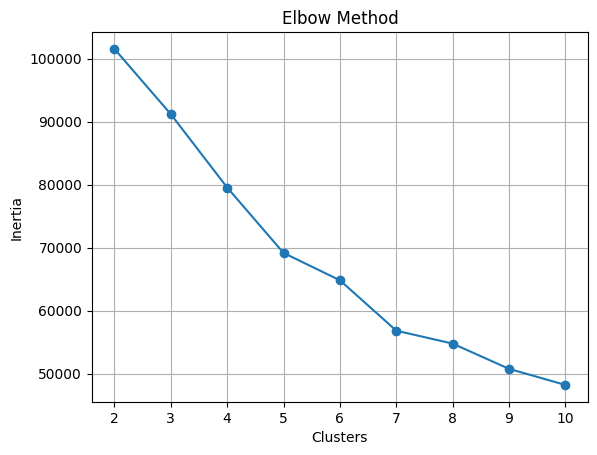

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import pandas as pd
import numpy as np

# Scaling Data
df = df.drop(columns=['x1'], errors='ignore')
scaled = StandardScaler().fit_transform(df)

# Fungsi Dunn Index
def dunn_index(X, labels):
    unique_clusters = np.unique(labels)
    n_clusters = len(unique_clusters)

    # Jarak minimum antar cluster
    min_intercluster = float('inf')
    for i in range(n_clusters):
        for j in range(i + 1, n_clusters):
            cluster_i = X[labels == unique_clusters[i]]
            cluster_j = X[labels == unique_clusters[j]]
            dist = np.min(cdist(cluster_i, cluster_j))
            if dist < min_intercluster:
                min_intercluster = dist

    # Diameter maksimum dalam cluster
    max_intracluster = 0
    for i in unique_clusters:
        cluster_i = X[labels == i]
        if len(cluster_i) > 1:
            dist = np.max(cdist(cluster_i, cluster_i))
            if dist > max_intracluster:
                max_intracluster = dist

    if max_intracluster == 0:
        return 0

    return min_intercluster / max_intracluster

# Evaluasi clustering dengan berbagai metrik
inertias, silhouettes, calinski, davies, dunn = [], [], [], [], []
cluster_range = range(2, 11)

for k in cluster_range:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(scaled)

    inertias.append(model.inertia_)
    silhouettes.append(silhouette_score(scaled, labels))
    calinski.append(calinski_harabasz_score(scaled, labels))
    davies.append(davies_bouldin_score(scaled, labels))
    dunn.append(dunn_index(scaled, labels))

# Buat DataFrame hasil evaluasi
kmeans_results = pd.DataFrame({
    'Clusters': list(cluster_range),
    'Inertia': inertias,
    'Silhouette Score': silhouettes,
    'Calinski-Harabasz': calinski,
    'Davies-Bouldin': davies,
    'Dunn-Index': dunn
})

print("=== KMEANS RESULTS ===")
print(kmeans_results)

# Visualisasi Elbow Method
plt.plot(cluster_range, inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()



=== AGGLOMERATIVE RESULTS ===
   Clusters  Silhouette Score  Calinski-Harabasz  Davies-Bouldin  Dunn-Index
0         2          0.331259        3455.923702        1.285732    0.049227
1         3          0.351912        2492.069352        1.249479    0.054522
2         4          0.355381        2187.189908        1.433175    0.056562
3         5          0.359387        2055.923905        1.316516    0.056562
4         6          0.258772        2002.362568        1.372090    0.034389
5         7          0.250176        1896.415198        1.524793    0.031334
6         8          0.253797        1766.787255        1.494995    0.041879
7         9          0.256097        1677.455018        1.435030    0.041879
8        10          0.265548        1620.724144        1.333617    0.041879


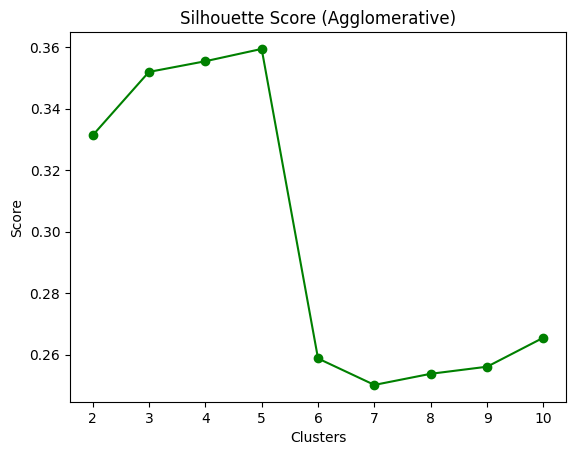

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Evaluasi Agglomerative Clustering
silhouettes2, calinski2, davies2, dunn2 = [], [], [], []

for k in cluster_range:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(scaled)

    silhouettes2.append(silhouette_score(scaled, labels))
    calinski2.append(calinski_harabasz_score(scaled, labels))
    davies2.append(davies_bouldin_score(scaled, labels))
    dunn2.append(dunn_index(scaled, labels))

# Buat DataFrame hasil evaluasi Agglomerative
agglo_results = pd.DataFrame({
    'Clusters': list(cluster_range),
    'Silhouette Score': silhouettes2,
    'Calinski-Harabasz': calinski2,
    'Davies-Bouldin': davies2,
    'Dunn-Index': dunn2
})

print("\n=== AGGLOMERATIVE RESULTS ===")
print(agglo_results)

plt.plot(cluster_range, silhouettes2, marker='o', color='green')
plt.title("Silhouette Score (Agglomerative)")
plt.xlabel("Clusters"); plt.ylabel("Score")
plt.show()

> Agglomerative Clustering dengan 4 cluster merupakan pilihan terbaik berdasarkan analisis metrik evaluasi seperti Silhouette Score, Calinski-Harabasz Index, Dunn Index, dan Davies-Bouldin Index. Model ini mampu mengelompokkan data dengan lebih baik dan stabil dibandingkan KMeans pada dataset ini.

## **Penjelasan Matematika**

## **Penjelasan Matematika**

**Silhouette Score**

nilai antara -1 hingga 1.Semakin tinggi, maka semakin baik cluster terbentuk.

             s= b−a/max(a,b)

    
* a: jarak rata-rata ke titik dalam cluster yang sama
* 𝑏 : jarak rata-rata ke cluster terdekat

**Calinski-Harabasz Index**

Rasio antar-cluster terhadap intra-cluster. Semain tinggi, maka semakin baik.

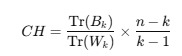

* 𝐵𝑘 : antara-cluster dispersion
* 𝑊𝑘 : dalam-cluster dispersion
* 𝑛 : jumlah sampel
* 𝑘 : jumlah cluster

**Davies-Bouldin Index**

Jika nilai lebih rendah maka lebih baik (rasio jarak antar-cluster dan ukuran cluster)

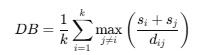

* 𝑠𝑖 : deviasi dalam cluster
* 𝑑𝑖𝑗 : jarak antar centroid cluster 𝑖 dan 𝑗

**Dunn Index**

Rasio jarak minimum antar-cluster dengan diameter maksimuk dalam cluster. Jika lebih tinggi maka lebih baik.

            D= min{inter-cluster distance} / max{intra-cluster distance}
